In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
from google.colab import drive

In [2]:
# Mount google drive
drive.mount("/content/drive")

Mounted at /content/drive


# Coordinates and euclidean distance

In [3]:
class Coordinate:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    @staticmethod
    # Euclidean distance between two points
    def cal_dist(a, b):
        return np.sqrt(((a.x - b.x) ** 2) + ((a.y - b.y) ** 2))

    @staticmethod
    def cal_tot_dist(coordinate):
        # Initializing distance
        distance = 0

        for f, s in zip(coordinate[:-1], coordinate[1:]):
            distance = distance + Coordinate.cal_dist(f, s)
        # Add the distance between the first point and the last point to complete the cycle
        distance = distance + Coordinate.cal_dist(coordinate[0], coordinate[-1])

        return distance


# Generate random nodes

In [4]:

coordinate = []
x = []
y = []

dim = 50

for i in range(dim):
    object = Coordinate(np.random.uniform(), np.random.uniform())
    x.append(object.x)
    y.append(object.y)
    coordinate.append(object)
    

# Rajasthan Tourist Places


In [5]:

df = pd.read_csv("/content/drive/My Drive/201951112.AI_Lab3/Rajasthan.csv")
x = df["x"]
y = df["y"]

dim = len(x)
coordinate = []

for i in range(dim):
    object = Coordinate(x[i], y[i])
    coordinate.append(object)

# VLSI datasets


In [6]:
def get_data(option=2):

    if (option == 1):
        file = "/content/drive/My Drive/201951112.AI_Lab3/xqf131.tsp"

    elif (option == 2):
        file = "/content/drive/My Drive/201951112.AI_Lab3/xqg237.tsp"

    elif (option == 3):
        file = "/content/drive/My Drive/201951112.AI_Lab3/pma343.tsp"
    
    elif (option == 4):
        file = "/content/drive/My Drive/201951112.AI_Lab3/pka379.tsp"

    elif (option == 5):
        file = "/content/drive/My Drive/201951112.AI_Lab3/bcl380.tsp"

    infile = open(file, "r")
    content = infile.readline().strip().split()

    while content[0] != "NODE_COORD_SECTION":
        if content[0] == "DIMENSION":
            dimension = content[2]
        content = infile.readline().strip().split()
    arr_x = []
    arr_y = []

    for i in range(0, int(dimension)):
        s, x, y = infile.readline().strip().split()[:]
        arr_x.append(float(x))
        arr_y.append(float(y))

    # Close the file
    infile.close()
    return dimension, arr_x, arr_y

In [7]:
# Mount google drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
x = []
y = []
coordinate = []

dim, x, y = get_data(2)

for i in range(len(x)):
    object = Coordinate(x[i], y[i])
    coordinate.append(object)


# Simulated Annealing

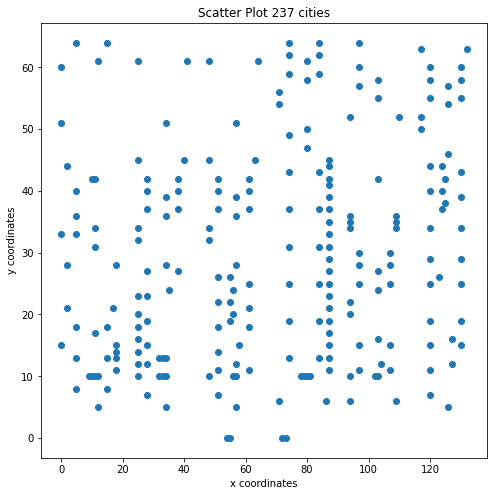

Percentage completed: 37%

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: RuntimeWarning: overflow encountered in exp


Percentage completed: 99%
Initial cost:  2949.5790533940426
Final cost after simulated annealing:  1784.3748326118246


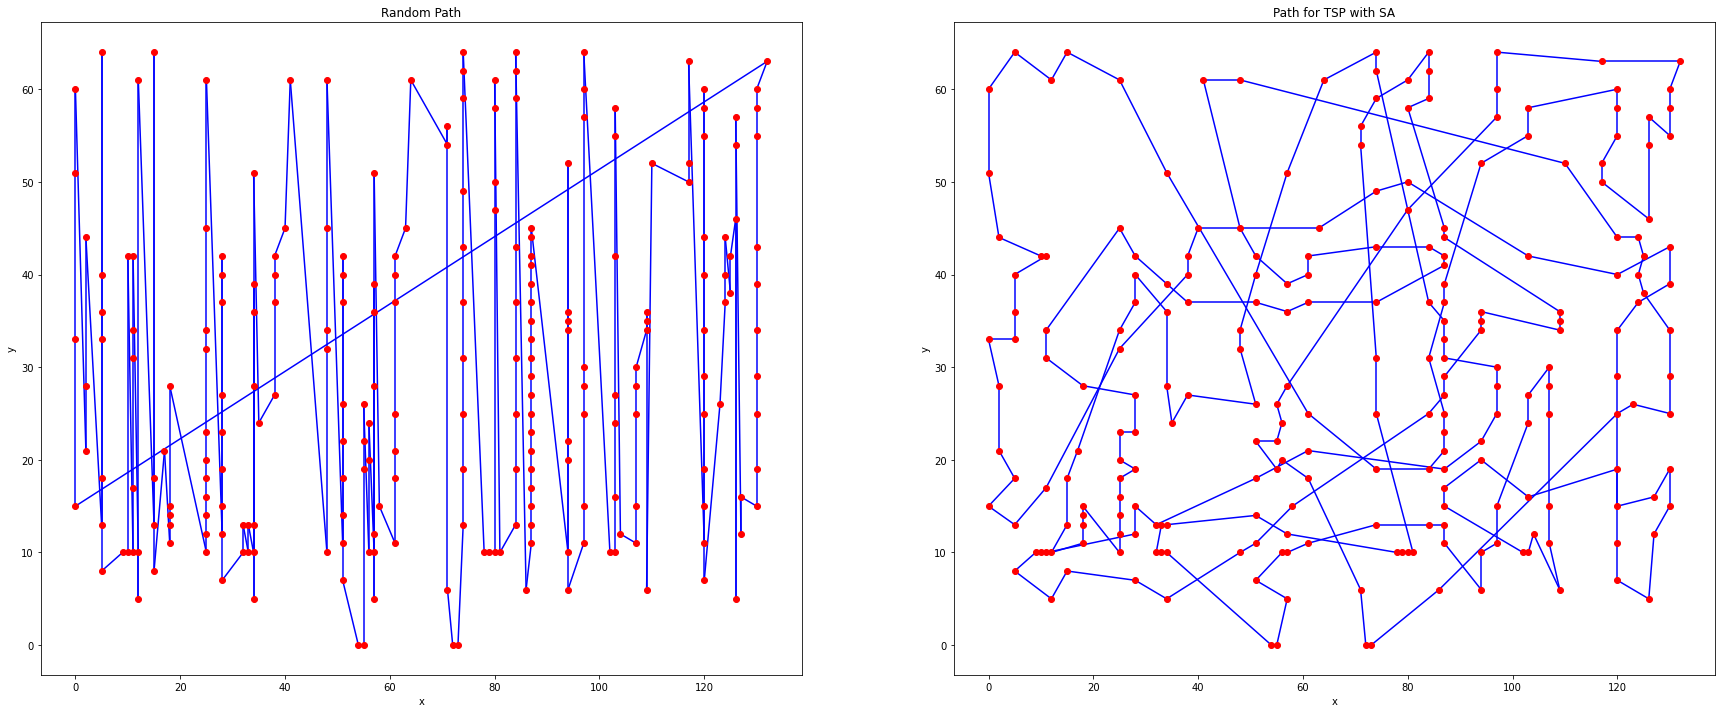

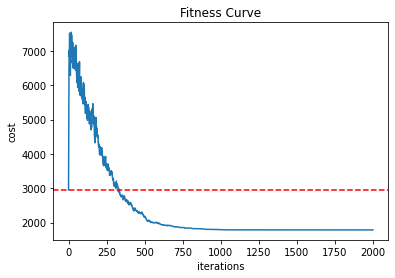

In [9]:

plt.figure(figsize=(8, 8))
plt.scatter(x, y)
plt.title("Scatter Plot %s cities" % (dim))
plt.xlabel("x coordinates")
plt.ylabel("y coordinates")
plt.show()

fig = plt.figure(figsize=(30, 12))
axes1 = fig.add_subplot(121)
axes2 = fig.add_subplot(122)
axes1.title.set_text("Random Path")
axes2.title.set_text("Path for TSP with SA")

for f, s in zip(coordinate[:-1], coordinate[1:]):
    axes1.plot([f.x, s.x], [f.y, s.y], "b")
axes1.plot(
    [coordinate[0].x, coordinate[-1].x], [coordinate[0].y, coordinate[-1].y], "b"
)
axes1.set_xlabel("x")
axes1.set_ylabel("y")
for coor in coordinate:
    axes1.plot(coor.x, coor.y, "ro")

costs = []
cost0 = Coordinate.cal_tot_dist(coordinate)
initial_cost = cost0

T = 30
factor = 0.995

iterations = 2000

for i in range(iterations):
    costs.append(cost0)
    sys.stdout.write("\r")
    sys.stdout.write("Percentage completed: %d%%" % ((i * 100)/ iterations))
    sys.stdout.flush()

    for j in range(500):
        c1, c2 = np.random.randint(0, len(coordinate), size=2)

        temp = coordinate[c1]
        coordinate[c1] = coordinate[c2]
        coordinate[c2] = temp

        cost1 = Coordinate.cal_tot_dist(coordinate)

        if cost1 < cost0:
            cost0 = cost1

        else:
            x = np.random.uniform()

            if x < (1/(1 + np.exp((cost0 - cost1)*(-1) / T))):
                cost0 = cost1

            else:
                temp = coordinate[c1]
                coordinate[c1] = coordinate[c2]
                coordinate[c2] = temp
    
    T = T * factor

print("\nInitial cost: ", initial_cost)
print("Final cost after simulated annealing: ", cost0)

for f, s in zip(coordinate[:-1], coordinate[1:]):
    axes2.plot([f.x, s.x], [f.y, s.y], "b")
axes2.plot(
    [coordinate[0].x, coordinate[-1].x], [coordinate[0].y, coordinate[-1].y], "b"
)

for coor in coordinate:
    axes2.plot(coor.x, coor.y, "ro")
axes2.set_xlabel("x")
axes2.set_ylabel("y")
plt.show()

print("\n\n")
plt.plot(np.arange(iterations), costs)
plt.axhline(y=initial_cost, color="r", linestyle="--")
plt.title("Fitness Curve")
plt.xlabel("iterations")
plt.ylabel("cost")
plt.show()

# Comparison of costs

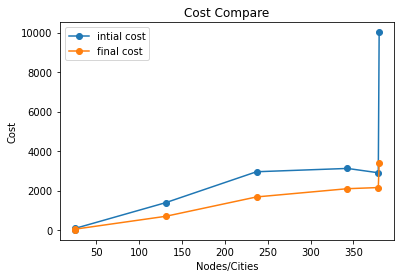

In [ ]:

nodes = [25, 25, 131, 237, 343, 379, 380]
cost_initial = [13.956, 76.127, 1383.916, 2949.579, 3117.179, 2898.213, 10013.540]
cost_final = [4.103, 40.486, 693.312, 1673.994, 2091.522, 2148.960, 3378.900]

plt.plot(nodes, cost_initial, nodes, cost_final, marker = "o")
plt.legend(["intial cost", "final cost"])
plt.title("Cost Compare")
plt.xlabel("Nodes/Cities")
plt.ylabel("Cost")
plt.show()

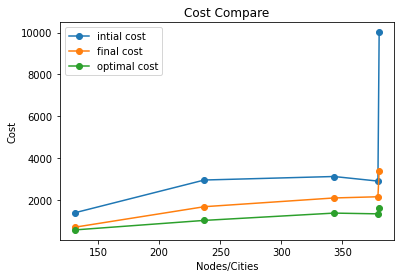

In [ ]:

nodes = [131, 237, 343, 379, 380]
cost_initial = [1383.916, 2949.579, 3117.179, 2898.213, 10013.540]
cost_final = [693.312, 1673.994, 2091.522, 2148.960, 3378.900]

cost_optimal = [564, 1019, 1368, 1332, 1621]

plt.plot(nodes, cost_initial, nodes, cost_final, nodes, cost_optimal, marker = "o")
plt.legend(["intial cost", "final cost", "optimal cost"])
plt.title("Cost Compare")
plt.xlabel("Nodes/Cities")
plt.ylabel("Cost")
plt.show()